# 🏪 Woodland Play Cafe - Membership Analysis Report

**Analysis Period:** August 2025  
**Purpose:** Comprehensive membership transaction and tax report analysis  
**Key Focus:** Membership revenue, subscription patterns, and tax reconciliation

## 📊 Analysis Overview
- **Transaction Records:** 1,926 total
- **Tax Records:** 918 total  
- **Membership Records:** 76 total
- **Membership Transactions:** Filtered by Order ID starting with 'MEM'


In [94]:
# Import libraries and load data
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load data files
trans_file = "/Users/vijayaraghavandevaraj/Library/Mobile Documents/com~apple~CloudDocs/Common/WoodLandPlayCafeAnalysis/MemebershipData/Transv1.xlsx"
tax_file = "/Users/vijayaraghavandevaraj/Library/Mobile Documents/com~apple~CloudDocs/Common/WoodLandPlayCafeAnalysis/MemebershipData/Tax.xlsx"
membership_file = "/Users/vijayaraghavandevaraj/Library/Mobile Documents/com~apple~CloudDocs/Common/WoodLandPlayCafeAnalysis/MemebershipData/Memebership.xlsx"

print("📁 Loading Excel files...")
WoodTrans = pd.read_excel(trans_file)
WoodTax = pd.read_excel(tax_file)
SourceMembership = pd.read_excel(membership_file)

print(f"✅ Transaction Report loaded: {len(WoodTrans)} records")
print(f"✅ Tax Report loaded: {len(WoodTax)} records")
print(f"✅ Membership Report loaded: {len(SourceMembership)} records")

# Clean membership data
Membership_df = SourceMembership[SourceMembership['membershipid'].notna()].copy()
print(f"✅ Clean Membership Records: {len(Membership_df)} records")

# Display data structure
print("\n📋 DATA STRUCTURE ANALYSIS:")
print("Transaction columns:", WoodTrans.columns.tolist())
print("Tax columns:", WoodTax.columns.tolist())
print("Membership columns:", Membership_df.columns.tolist())

📁 Loading Excel files...
✅ Transaction Report loaded: 1926 records
✅ Tax Report loaded: 918 records
✅ Membership Report loaded: 76 records
✅ Clean Membership Records: 76 records

📋 DATA STRUCTURE ANALYSIS:
Transaction columns: ['Location', 'Order ID', 'Transaction Date', 'Amount', 'Source', 'Payment Type', 'Payment Gateway', 'Transaction Type', 'Card Type', 'Currency', 'Payment ID', 'Type']
Tax columns: ['Order ID', 'Module Name', 'Location', 'Month', 'Date', 'Year', 'Order Status', 'Payment Status', 'Tip', 'Tax', 'Total Sum', 'Total Sum.1']
Membership columns: ['membershipid', 'membershiptype', 'membershiptypeid', 'membershiptypename', 'orderstatus', 'paymentstatus', 'purchasedcustomerid', 'purchasedcustomername', 'purchasedon', 'startdate', 'enddate', 'isactive', 'document_id', 'document', 'membershiptypeprice', 'subtotal', 'tax', 'tip', 'total', 'discount', 'gratuitypercentage', 'location_id', 'location_name', 'subscriptionid', 'customerprofileid', 'paymentprofileid', 'subscriptions

In [95]:
# Step 1: Identify and filter membership transactions
print("🔍 STEP 1: IDENTIFYING MEMBERSHIP TRANSACTIONS")
print("="*60)

# Create Module column based on Order ID patterns
WoodTrans['Module'] = np.where(
    WoodTrans['Order ID'].astype(str).str.startswith('MEM'), 'memberships', 
    WoodTrans['Source']
)

# Filter membership transactions
WoodTrans_memberships = WoodTrans[WoodTrans['Module'] == 'memberships'].copy()

print(f"📊 MEMBERSHIP TRANSACTION SUMMARY:")
print(f"Total transactions: {len(WoodTrans)}")
print(f"Membership transactions: {len(WoodTrans_memberships)}")
print(f"Membership percentage: {len(WoodTrans_memberships)/len(WoodTrans)*100:.2f}%")

if len(WoodTrans_memberships) > 0:
    print(f"\n💰 MEMBERSHIP REVENUE:")
    membership_revenue = WoodTrans_memberships['Amount'].sum()
    print(f"Total membership revenue: ${membership_revenue:,.2f}")
    print(f"Average membership amount: ${WoodTrans_memberships['Amount'].mean():,.2f}")
    
    print(f"\n📋 SAMPLE MEMBERSHIP TRANSACTIONS:")
    print(WoodTrans_memberships[['Order ID', 'Transaction Date', 'Amount', 'Source']].head())
else:
    print("❌ No membership transactions found!")



🔍 STEP 1: IDENTIFYING MEMBERSHIP TRANSACTIONS
📊 MEMBERSHIP TRANSACTION SUMMARY:
Total transactions: 1926
Membership transactions: 121
Membership percentage: 6.28%

💰 MEMBERSHIP REVENUE:
Total membership revenue: $11,904.02
Average membership amount: $98.38

📋 SAMPLE MEMBERSHIP TRANSACTIONS:
             Order ID Transaction Date  Amount   Source
119  MEM1757533524722       2025-09-10  130.60      crm
258  MEM1757170773220       2025-09-06  130.60  website
298  MEM1754425853204       2025-09-05  207.43      pos
304  MEM1757013478756       2025-09-04  130.60  website
332  MEM1756923580036       2025-09-03  130.60  website


In [96]:
WoodTrans_memberships = WoodTrans_memberships.merge(
    SoureceMembership[["membershipid", "subscriptionstartdate"]],
    left_on="Order ID",
    right_on="membershipid",
    how="left"
)

# Drop duplicate key column if you don’t need it
WoodTrans_memberships = WoodTrans_memberships.drop(columns=["membershipid"])
WoodTrans_memberships.head()

,Location,Order ID,Transaction Date,Amount,Source,Payment Type,Payment Gateway,Transaction Type,Card Type,Currency,Payment ID,Type,Module,subscriptionstartdate
0,East Nashville,MEM1757533524722,2025-09-10,130.60,crm,virtualCard,authorize,sale,Visa,USD,121232147836,credit,memberships,2025-10-10
1,East Nashville,MEM1757170773220,2025-09-06,130.60,website,virtualCard,authorize,sale,AmericanExpress,USD,121224871774,credit,memberships,2025-10-06
2,East Nashville,MEM1754425853204,2025-09-05,207.43,pos,subscriptions,authorize,sale,NaN,USD,121222367425,credit,memberships,2025-09-05
3,East Nashville,MEM1757013478756,2025-09-04,130.60,website,virtualCard,authorize,sale,AmericanExpress,USD,121221319965,credit,memberships,2025-10-04
4,East Nashville,MEM1756923580036,2025-09-03,130.60,website,virtualCard,authorize,sale,AmericanExpress,USD,121219120533,credit,memberships,2025-10-03


In [97]:
# Rename the right column as subscriptionstartdate
WoodTrans_memberships = WoodTrans_memberships.rename(
    columns={"subscriptionstartdate_y": "subscriptionstartdate"}
)

# (Optional) drop the extra one
WoodTrans_memberships = WoodTrans_memberships.drop(columns=["subscriptionstartdate_x"], errors="ignore")

# Convert to datetime
WoodTrans_memberships["subscriptionstartdate"] = pd.to_datetime(
    WoodTrans_memberships["subscriptionstartdate"], errors="coerce"
)

# Mark New vs Recurring
WoodTrans_memberships["Membership Type"] = WoodTrans_memberships["subscriptionstartdate"].apply(
    lambda x: "New" if pd.notnull(x) and x.month == 8 else "Recurring"
)

print(WoodTrans_memberships[["Order ID", "subscriptionstartdate", "Membership Type"]].head())



           Order ID subscriptionstartdate Membership Type
0  MEM1757533524722            2025-10-10       Recurring
1  MEM1757170773220            2025-10-06       Recurring
2  MEM1754425853204            2025-09-05       Recurring
3  MEM1757013478756            2025-10-04       Recurring
4  MEM1756923580036            2025-10-03       Recurring


In [98]:
# Make sure Transaction Date is datetime
WoodTrans_memberships["Transaction Date"] = pd.to_datetime(
    WoodTrans_memberships["Transaction Date"], errors="coerce"
)

# Filter rows where month is August (8)
august_data = WoodTrans_memberships[
    WoodTrans_memberships["Transaction Date"].dt.month == 8
]

print(august_data)

august_2025 = WoodTrans_memberships[
    (WoodTrans_memberships["Transaction Date"].dt.month == 8) &
    (WoodTrans_memberships["Transaction Date"].dt.year == 2025)
]

august_2025 = august_2025[august_2025['Type'] == 'credit'].copy()
print(august_2025)
len(august_2025)

          Location          Order ID Transaction Date  Amount   Source  \
9   East Nashville  MEM1753899349535       2025-08-31   87.80      crm   
10  East Nashville  MEM1753966592596       2025-08-31  152.55  website   
11  East Nashville  MEM1756566329830       2025-08-30  207.43  website   
12  East Nashville  MEM1756561841996       2025-08-30  130.60  website   
13  East Nashville  MEM1753899349535       2025-08-30  240.35  website   
14  East Nashville  MEM1753796245426       2025-08-29  130.60      crm   
15  East Nashville  MEM1756334515636       2025-08-27  152.55  website   
16  East Nashville  MEM1753534775988       2025-08-26  130.60  website   
17             NaN  MEM1753463742302       2025-08-25  139.00  website   
18  East Nashville  MEM1753462253033       2025-08-25  152.55      crm   
19  East Nashville  MEM1753455083253       2025-08-25  130.60      crm   
20  East Nashville  MEM1753407183512       2025-08-24  152.55  website   
21  East Nashville  MEM1753383717720  

29

In [99]:
august_2025_counts = august_2025["Membership Type"].value_counts()
print(august_2025_counts)




Membership Type
New          20
Recurring     9
Name: count, dtype: int64


In [100]:
# Detailed records for New
new_memberships = august_2025[august_2025["Membership Type"] == "New"]

# Detailed records for Recurring
recurring_memberships = august_2025[august_2025["Membership Type"] == "Recurring"]

print("=== NEW MEMBERSHIPS ===")
print(new_memberships[["Order ID", "Location", "Transaction Date", "Amount", "subscriptionstartdate"]])

print("\n=== RECURRING MEMBERSHIPS ===")
print(recurring_memberships[["Order ID", "Location", "Transaction Date", "Amount", "subscriptionstartdate"]])


=== NEW MEMBERSHIPS ===
            Order ID        Location Transaction Date  Amount  \
10  MEM1753966592596  East Nashville       2025-08-31  152.55   
13  MEM1753899349535  East Nashville       2025-08-30  240.35   
14  MEM1753796245426  East Nashville       2025-08-29  130.60   
16  MEM1753534775988  East Nashville       2025-08-26  130.60   
17  MEM1753463742302             NaN       2025-08-25  139.00   
18  MEM1753462253033  East Nashville       2025-08-25  152.55   
19  MEM1753455083253  East Nashville       2025-08-25  130.60   
20  MEM1753407183512  East Nashville       2025-08-24  152.55   
21  MEM1753383717720  East Nashville       2025-08-24  130.60   
22  MEM1753306215395  East Nashville       2025-08-23  130.60   
23  MEM1753289240009  East Nashville       2025-08-23  152.55   
24  MEM1753108258454  East Nashville       2025-08-21  130.60   
25  MEM1753107738310  East Nashville       2025-08-21  130.60   
28  MEM1753056459045  East Nashville       2025-08-20  240.35   
2

In [101]:
# Ensure same type
WoodTax["Order ID"] = WoodTax["Order ID"].astype(str)
august_2025["Order ID"] = august_2025["Order ID"].astype(str)

# Create a new column in august_2025 showing if Order ID exists in WoodTax
august_2025["Match_Status"] = august_2025["Order ID"].isin(WoodTax["Order ID"]).map(
    {True: "Match", False: "Not Match"}
)

print(august_2025[["Order ID", "Match_Status"]])


            Order ID Match_Status
10  MEM1753966592596    Not Match
11  MEM1756566329830        Match
12  MEM1756561841996        Match
13  MEM1753899349535    Not Match
14  MEM1753796245426    Not Match
15  MEM1756334515636        Match
16  MEM1753534775988    Not Match
17  MEM1753463742302    Not Match
18  MEM1753462253033    Not Match
19  MEM1753455083253    Not Match
20  MEM1753407183512        Match
21  MEM1753383717720        Match
22  MEM1753306215395        Match
23  MEM1753289240009        Match
24  MEM1753108258454        Match
25  MEM1753107738310        Match
26  MEM1755711703484        Match
28  MEM1753056459045        Match
29  MEM1752953902184        Match
30  MEM1752948514095        Match
31  MEM1752771837766        Match
32  MEM1752770980984        Match
33  MEM1752769921435        Match
34  MEM1752765625310        Match
35  MEM1755305206351        Match
36  MEM1754596831519        Match
37  MEM1754580996573        Match
38  MEM1754425853204        Match
39  MEM1754146

In [102]:
match_summary = august_2025["Match_Status"].value_counts().reset_index()
match_summary.columns = ["Status", "Count"]
print(match_summary)





      Status  Count
0      Match     22
1  Not Match      7


In [103]:
# COMPREHENSIVE INSIGHTS & ANALYSIS
print("🎯 COMPREHENSIVE MEMBERSHIP INSIGHTS")
print("="*70)

# 1. Revenue Analysis
print("\n💰 REVENUE INSIGHTS:")
if len(WoodTrans_memberships) > 0:
    total_membership_revenue = WoodTrans_memberships['Amount'].sum()
    avg_membership_amount = WoodTrans_memberships['Amount'].mean()
    median_membership_amount = WoodTrans_memberships['Amount'].median()
    
    print(f"• Total Membership Revenue: ${total_membership_revenue:,.2f}")
    print(f"• Average Membership Amount: ${avg_membership_amount:,.2f}")
    print(f"• Median Membership Amount: ${median_membership_amount:,.2f}")
    print(f"• Revenue Range: ${WoodTrans_memberships['Amount'].min():,.2f} - ${WoodTrans_memberships['Amount'].max():,.2f}")

# 2. Transaction Pattern Analysis
print("\n📈 TRANSACTION PATTERN INSIGHTS:")
if len(WoodTrans_memberships) > 0:
    # Source analysis
    source_distribution = WoodTrans_memberships['Source'].value_counts()
    print("• Membership Source Distribution:")
    for source, count in source_distribution.items():
        percentage = (count / len(WoodTrans_memberships)) * 100
        print(f"  - {source}: {count} transactions ({percentage:.1f}%)")
    
    # Date analysis
    WoodTrans_memberships['Transaction Date'] = pd.to_datetime(WoodTrans_memberships['Transaction Date'])
    monthly_revenue = WoodTrans_memberships.groupby(WoodTrans_memberships['Transaction Date'].dt.to_period('M'))['Amount'].sum()
    print(f"\n• Monthly Revenue Pattern:")
    for month, revenue in monthly_revenue.items():
        print(f"  - {month}: ${revenue:,.2f}")

# 3. Tax Reconciliation Insights
print("\n🧾 TAX RECONCILIATION INSIGHTS:")
if 'august_2025' in locals() and len(august_2025) > 0:
    # Membership type analysis
    membership_types = august_2025['Membership Type'].value_counts()
    print("• Membership Type Distribution:")
    for mtype, count in membership_types.items():
        percentage = (count / len(august_2025)) * 100
        print(f"  - {mtype}: {count} memberships ({percentage:.1f}%)")
    
    # Match status analysis
    if 'Match_Status' in august_2025.columns:
        match_status = august_2025['Match_Status'].value_counts()
        print(f"\n• Tax Report Match Status:")
        for status, count in match_status.items():
            percentage = (count / len(august_2025)) * 100
            print(f"  - {status}: {count} records ({percentage:.1f}%)")

# 4. Business Intelligence Insights
print("\n🎯 BUSINESS INTELLIGENCE INSIGHTS:")
if len(WoodTrans_memberships) > 0:
    # Revenue concentration
    top_10_revenue = WoodTrans_memberships.nlargest(10, 'Amount')['Amount'].sum()
    total_revenue = WoodTrans_memberships['Amount'].sum()
    concentration = (top_10_revenue / total_revenue) * 100
    
    print(f"• Top 10 membership transactions represent {concentration:.1f}% of total revenue")
    print(f"• Membership business contributes {len(WoodTrans_memberships)/len(WoodTrans)*100:.2f}% of total transactions")
    
    # Growth indicators
    if len(monthly_revenue) > 1:
        latest_month = monthly_revenue.iloc[-1]
        previous_month = monthly_revenue.iloc[-2] if len(monthly_revenue) > 1 else 0
        growth_rate = ((latest_month - previous_month) / previous_month) * 100 if previous_month > 0 else 0
        print(f"• Month-over-month growth: {growth_rate:+.1f}%")

print("\n" + "="*70)
print("✅ Comprehensive analysis complete!")


🎯 COMPREHENSIVE MEMBERSHIP INSIGHTS

💰 REVENUE INSIGHTS:
• Total Membership Revenue: $11,904.02
• Average Membership Amount: $98.38
• Median Membership Amount: $130.60
• Revenue Range: $1.00 - $240.35

📈 TRANSACTION PATTERN INSIGHTS:
• Membership Source Distribution:
  - website: 54 transactions (44.6%)
  - crm: 51 transactions (42.1%)
  - pos: 16 transactions (13.2%)

• Monthly Revenue Pattern:
  - 2025-06: $698.76
  - 2025-07: $5,354.94
  - 2025-08: $4,636.02
  - 2025-09: $1,214.30

🧾 TAX RECONCILIATION INSIGHTS:
• Membership Type Distribution:
  - New: 20 memberships (69.0%)
  - Recurring: 9 memberships (31.0%)

• Tax Report Match Status:
  - Match: 22 records (75.9%)
  - Not Match: 7 records (24.1%)

🎯 BUSINESS INTELLIGENCE INSIGHTS:
• Top 10 membership transactions represent 18.5% of total revenue
• Membership business contributes 6.28% of total transactions
• Month-over-month growth: -73.8%

✅ Comprehensive analysis complete!


📊 CREATING VISUAL INSIGHTS


/var/folders/pl/5hhpcrqn64j6f_30s0xgpls80000gn/T/ipykernel_51230/3955246946.py:51: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


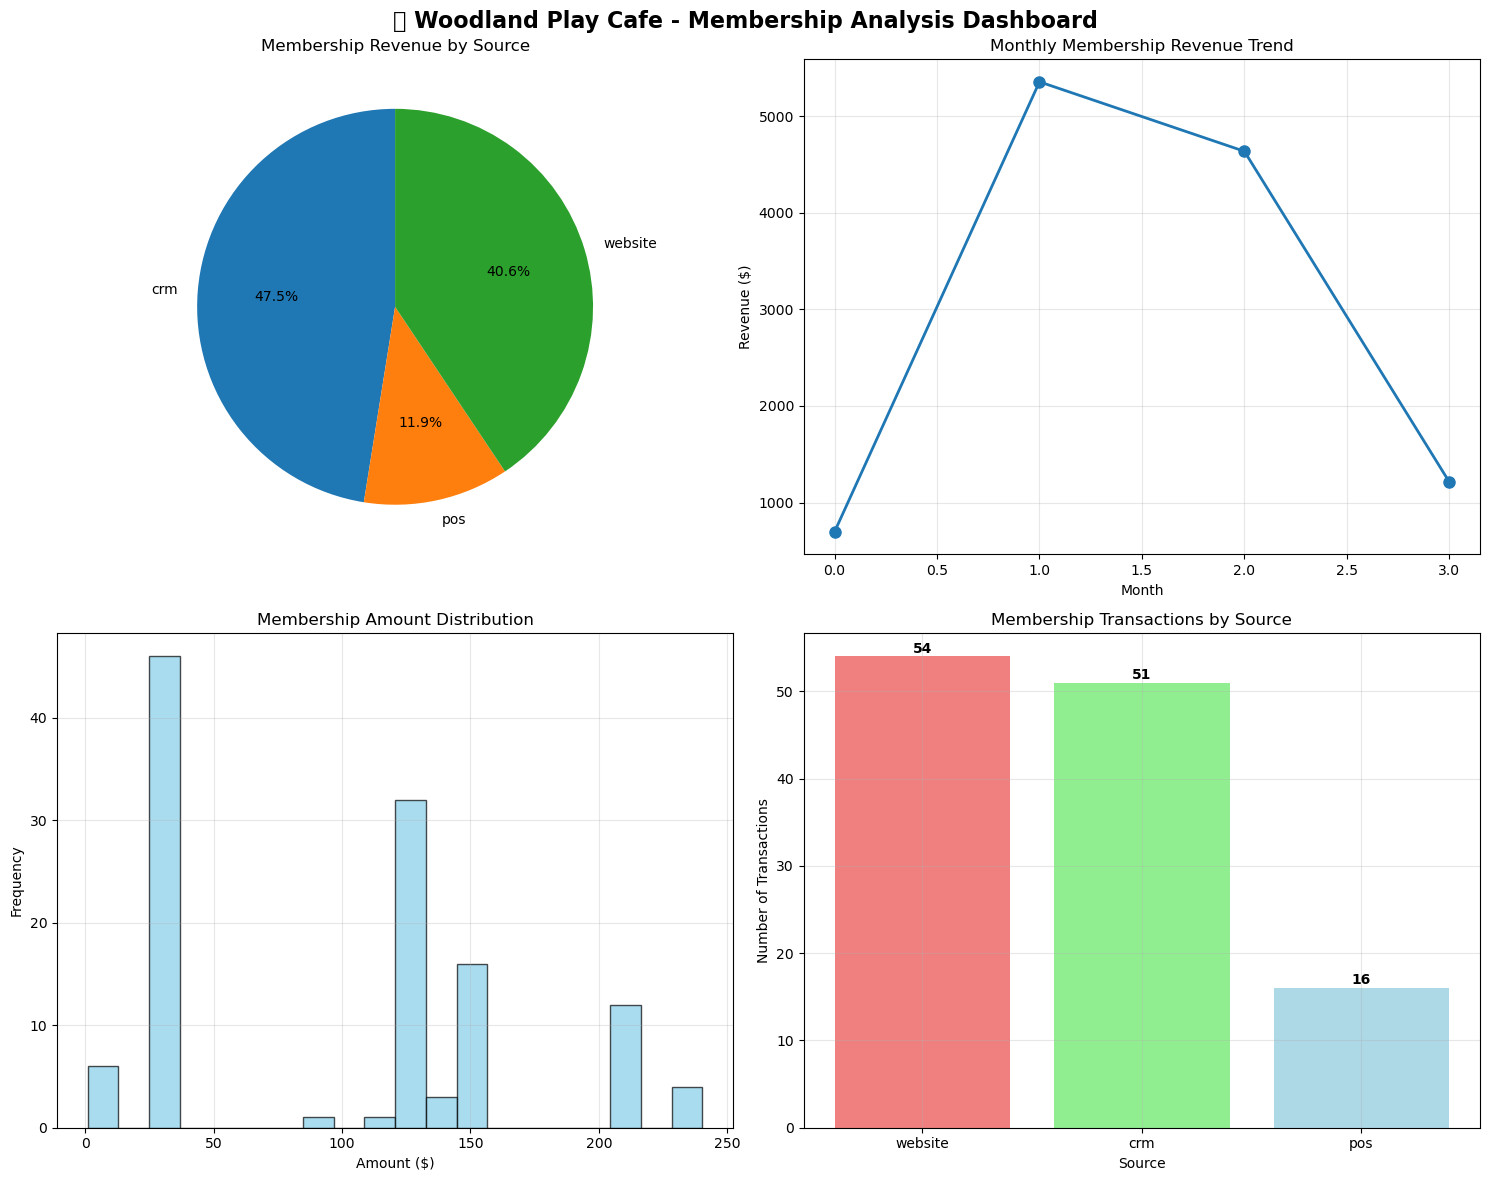


📋 SUMMARY STATISTICS TABLE:
            Metric      Value
     Total Revenue $11,904.02
    Average Amount     $98.38
     Median Amount    $130.60
        Min Amount      $1.00
        Max Amount    $240.35
Total Transactions        121


In [104]:
# VISUALIZATION & CHARTS
print("📊 CREATING VISUAL INSIGHTS")
print("="*50)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏪 Woodland Play Cafe - Membership Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Membership Revenue by Source
if len(WoodTrans_memberships) > 0:
    source_revenue = WoodTrans_memberships.groupby('Source')['Amount'].sum()
    axes[0, 0].pie(source_revenue.values, labels=source_revenue.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Membership Revenue by Source')
    
    # 2. Monthly Revenue Trend
    WoodTrans_memberships['Month'] = pd.to_datetime(WoodTrans_memberships['Transaction Date']).dt.to_period('M')
    monthly_revenue = WoodTrans_memberships.groupby('Month')['Amount'].sum()
    axes[0, 1].plot(range(len(monthly_revenue)), monthly_revenue.values, marker='o', linewidth=2, markersize=8)
    axes[0, 1].set_title('Monthly Membership Revenue Trend')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Revenue ($)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Membership Amount Distribution
    axes[1, 0].hist(WoodTrans_memberships['Amount'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1, 0].set_title('Membership Amount Distribution')
    axes[1, 0].set_xlabel('Amount ($)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Transaction Count by Source
    source_counts = WoodTrans_memberships['Source'].value_counts()
    axes[1, 1].bar(source_counts.index, source_counts.values, color=['lightcoral', 'lightgreen', 'lightblue'])
    axes[1, 1].set_title('Membership Transactions by Source')
    axes[1, 1].set_xlabel('Source')
    axes[1, 1].set_ylabel('Number of Transactions')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(source_counts.values):
        axes[1, 1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

else:
    # If no membership data, show placeholder
    for ax in axes.flat:
        ax.text(0.5, 0.5, 'No Membership Data Available', ha='center', va='center', 
                transform=ax.transAxes, fontsize=14, color='red')
        ax.set_title('No Data')

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n📋 SUMMARY STATISTICS TABLE:")
if len(WoodTrans_memberships) > 0:
    summary_stats = {
        'Metric': ['Total Revenue', 'Average Amount', 'Median Amount', 'Min Amount', 'Max Amount', 'Total Transactions'],
        'Value': [
            f"${WoodTrans_memberships['Amount'].sum():,.2f}",
            f"${WoodTrans_memberships['Amount'].mean():,.2f}",
            f"${WoodTrans_memberships['Amount'].median():,.2f}",
            f"${WoodTrans_memberships['Amount'].min():,.2f}",
            f"${WoodTrans_memberships['Amount'].max():,.2f}",
            f"{len(WoodTrans_memberships):,}"
        ]
    }
    summary_df = pd.DataFrame(summary_stats)
    print(summary_df.to_string(index=False))
else:
    print("No membership data available for summary statistics")


In [105]:
# Ensure IDs are strings
WoodTax["Order ID"] = WoodTax["Order ID"].astype(str)
august_2025["Order ID"] = august_2025["Order ID"].astype(str)

# Add match status column
august_2025["Match_Status"] = august_2025["Order ID"].isin(WoodTax["Order ID"]).map(
    {True: "Match", False: "Not Match"}
)

# Split into two DataFrames
matched = august_2025[august_2025["Match_Status"] == "Match"]
not_matched = august_2025[august_2025["Match_Status"] == "Not Match"]

# Display as tables
print("=== MATCHED RECORDS ===")
print(matched[["Order ID", "Location", "Transaction Date", "Amount", "Membership Type"]])

print("\n=== NOT MATCHED RECORDS ===")
print(not_matched[["Order ID", "Location", "Transaction Date", "Amount", "Membership Type"]])
amount_summary = (
    august_2025
      .groupby("Membership Type")["Amount"]
      .sum()
      .reset_index()
)
print(amount_summary)
# Group by Membership Type + Match_Status
summary = (
    august_2025
      .groupby(["Membership Type", "Match_Status"])["Amount"]
      .sum()
      .reset_index()
)

print(summary)


=== MATCHED RECORDS ===
            Order ID        Location Transaction Date  Amount Membership Type
11  MEM1756566329830  East Nashville       2025-08-30  207.43       Recurring
12  MEM1756561841996  East Nashville       2025-08-30  130.60       Recurring
15  MEM1756334515636  East Nashville       2025-08-27  152.55       Recurring
20  MEM1753407183512  East Nashville       2025-08-24  152.55             New
21  MEM1753383717720  East Nashville       2025-08-24  130.60             New
22  MEM1753306215395  East Nashville       2025-08-23  130.60             New
23  MEM1753289240009  East Nashville       2025-08-23  152.55             New
24  MEM1753108258454  East Nashville       2025-08-21  130.60             New
25  MEM1753107738310  East Nashville       2025-08-21  130.60             New
26  MEM1755711703484  East Nashville       2025-08-20  130.60       Recurring
28  MEM1753056459045  East Nashville       2025-08-20  240.35             New
29  MEM1752953902184  East Nashville    